In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# we can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# query the last data point
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

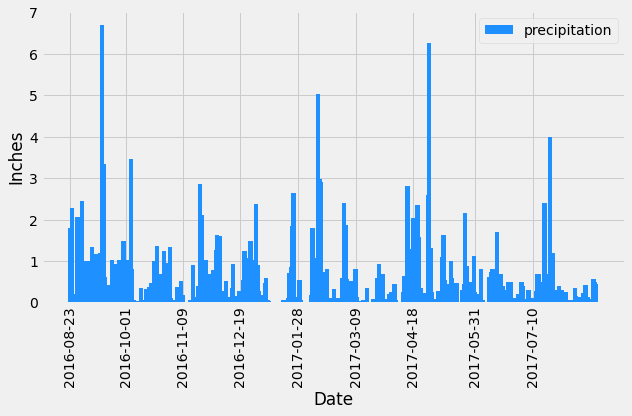

In [11]:
# design a query to retrieve the last 12 months of precipitation data and plot the results

# calculate the date 1 year ago from the last data point in the database
last_date = dt.date(2017, 8, 23)
year_ago = last_date - dt.timedelta(days=365)

# perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= year_ago).filter(Measurement.date <= last_date).all()

# save the query results as a Pandas DataFrame and set the index to the date column
scores_df = pd.DataFrame(results)
scores_df.set_index("date", inplace=True)

# sort the dataframe by date
scores_sorted = scores_df.sort_index()

# use Pandas Plotting with Matplotlib to plot the data
precipitation = scores_sorted.prcp.tolist()

plt.figure(figsize=(9, 6))
plt.bar(scores_sorted.index, precipitation, color="dodgerblue", width=3, linewidth=4)

plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend(["precipitation"], loc="upper right")

plt.xticks(scores_sorted.index[::250], rotation="90")
plt.tight_layout()
plt.show()

In [12]:
# use Pandas to calculate the summary statistics for the precipitation data
scores_sorted.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [ ]:
# design a query to show how many stations are available in this dataset?


In [ ]:
# what are the most active stations? (i.e. what stations have the most rows)?
# list the stations and the counts in descending order.


In [ ]:
# using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [ ]:
# choose the station with the highest number of temperature observations.
# query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [ ]:
# this function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# plot the results from your previous query as a bar chart. 
# use "Trip Avg Temp" as your Title
# use the average temperature for the y value
# use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# set the start and end date of the trip

# use the start and end date to create a range of dates

# stip off the year and save a list of %m-%d strings

# loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# plot the daily normals as an area plot with `stacked=False`
